# Lecture 13

### binomial distribution
* roll a die, the chance of getting 6 is 1/6
* roll 100 dice, the chance of getting all sixes in $\frac{1}{6}^{100}$
    * the chance of getting no sixes at all is $\frac{5}{6}^{100}$

* roll 4 dice, what are the chances of getting exactly 2 sixes?
    * 66xx, 6x6x, 6xx6, x6x6, xx66, (where x stands for 1-5)
        * each of the above events has the probability $\frac{1}{6}^{2}\frac{5}{6}^{2}$
        * number of events above: choose 2 combinations from 4: $\frac{4!}{2!2!}$
        * $P=\frac{4!}{2!2!}*\frac{1}{6}^{2}\frac{5}{6}^{2}$
* probability of exactly 20 sixes out of 20 rolls?
    * possible positions for 20 sixes: choose 20 combination from 100:$\frac{100!}{20!80!}$
    * each of the events has the probability $\frac{1}{6}^{20}\frac{5}{6}^{80}$ 
    * $P=\frac{100!}{20!80!}*\frac{1}{6}^{20}\frac{5}{6}^{80}$

### binomial distribution pmf
* mean: np
* variance: np(1-p)

In [20]:
from math import factorial
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

0.24609375
0.24609375000000003


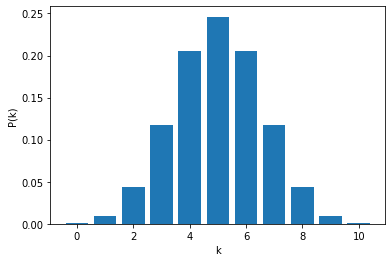

In [26]:
#flip a coin 10 times, what is the probability of seeing exactly 5 heads
def nchoosek(n,k):
    return factorial(n)/factorial(k)/factorial(n-k)
def binomPMF(k,n,p):
    return nchoosek(n,k)*p**k*(1-p)**(n-k)
print(binomPMF(5,10,0.5))

#possible to get same result without writing out your own function
print(stats.binom.pmf(5,10,0.5))
plt.bar(range(11),stats.binom.pmf(range(11),10,0.5))
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()

0.623046875
0.6230468749999999


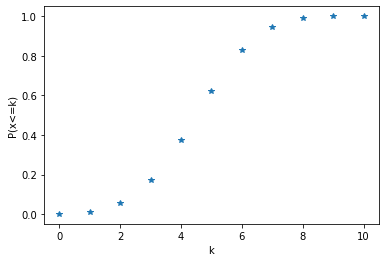

In [27]:
#flip a coin 10 time, what is the probability of seeing at least 5 heads
#use sum() function for "at least"
print(sum((binomPMF(i,10,0.5) for i in range(5,11))))
print(sum(stats.binom.pmf(range(5,11),10,0.5)))

plt.plot(range(11),np.cumsum(stats.binom.pmf(range(11),10,0.5)),'*')
plt.xlabel('k')
plt.ylabel('P(x<=k)')
plt.show()

### statistical hypothesis testing
* I give you a coin, which could be a “fair” coin or could be “loaded”
    * If you flip it, a fair coin gives head and tail with equal probability
    * In contrast, a loaded coin tends to give one side more frequently (either head or tail) than the other
    * Give you a coin, how do you know the coin is likely fair or loaded?
* Classical setup
    * H0 (null hypothesis): the coin is fair
    * H1 (alternative hypothesis): the coin is loaded (i.e., biased towards head or tail)
        * Usually, it is hard to argue how loaded it could be
    * Based on experimental results, can we determine that H0 is unlikely true and therefore reject it?